Date- 17th Jan 2025

Mr. Abhishek Raj

AI Lab

Assignment 3

Simple Linear Regression

In this assignment, you need to implement a simple linear regression model using gradient descent algorithm on the following database.

Database

Independent/Predictor Variable -

xxxxxxxz

Dependent/Response Variable -

zzzzzzzz

You are required to use the following Cost function

Answer the following questions based on your observations

1. Use linear regression to fit a straight line to the given database. Set your learning rate to 0.5. What are the cost function value and learning parameters values after convergence? Also, mention the convergence criteria you used.

2. The cost function that we are using in this assignment is different than the one we used in class. Can you think of the advantage of averaging the cost?

3. Plot cost function v/s iteration graph for the model in question 1 for first 50 iterations.

4. Plot the given dataset on a graph and also print the straight line you obtained in question 1 to show how it fits the data.

5. Test your regression model with the learning rates lr = 0.005, lr = 0.5, lr = 5 For each learning rate, plot a graph showing how the cost function changes for the first 50 iterations and write your observation.

6. Choose a suitable learning rate, then implement stochastic and min-batch gradient descent, plot the cost function against iteration, and observe how your cost function changes compared to batch gradient descent.
Note

1. Use batch gradient descent unless mentioned in the question.

2. Your code should be in Python.

3. Normalize the data before training.

4. You are required to implement the linear regression model yourself. You are not allowed to use libraries like sci-kit learn, Tensorflow, Pytorch, etc, and use their built-in linear regression models.

5. You may use libraries like numpy, pandas, matplotlib, etc to read and manipulate the dataset and plot the graphs.

6. Your plots should be labeled properly.

7. Normalize your predictor before starting training the model.
How to Submit?

1. You need a submit a single PDF report file and the name of that file should be your roll numbers.

2. Your report should have answers to all the questions with the plots. Upload your code on github and mention the link in the report. Do not copy paste code in the report.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#load the datasets
X=pd.read_csv('linearX.csv', header=None).values
y=pd.read_csv('linearY.csv', header=None).values

In [ ]:
#normalize the predictor variable X
X=(X-np.mean(X))/np.std(X)

In [ ]:
#define constants
learning_rates=[0.005,0.5,5]
iterations=1000
convergence_threshold=1e-6
batch_size=10

In [ ]:
#cost function
def cost_function(theta0,theta1):
    cost=np.mean((theta0+theta1*X-y)**2)/2
    return cost

In [ ]:
#batch gradient descent
def batch_gradient_descent(lr,max_iter=1000):
    theta0,theta1=0,0
    costs=[]
    for i in range(max_iter):
        dtheta0=np.mean(theta0+theta1*X-y)
        dtheta1=np.mean((theta0+theta1*X-y)*X)
        theta0-=lr*dtheta0
        theta1-=lr*dtheta1
        costs.append(cost_function(theta0,theta1))
        if i>0 and abs(costs[-1]-costs[-2])<convergence_threshold:
            break
    return theta0,theta1,costs

In [ ]:
#stochastic gradient descent
def stochastic_gradient_descent(lr,max_iter=1000):
    theta0,theta1=0,0
    costs=[]
    for i in range(max_iter):
        for j in range(len(X)):
            idx=np.random.randint(0,len(X))
            xi,yi=X[idx],y[idx]
            dtheta0=theta0+theta1*xi-yi
            dtheta1=(theta0+theta1*xi-yi)*xi
            theta0-=lr*dtheta0
            theta1-=lr*dtheta1
        costs.append(cost_function(theta0,theta1))
    return theta0,theta1,costs

In [ ]:
#mini-batch gradient descent
def mini_batch_gradient_descent(lr, batch_size, max_iter=1000):
    theta0,theta1=0,0
    costs=[]
    for i in range(max_iter):
        indices=np.random.choice(len(X),batch_size,replace=False)
        X_batch,y_batch=X[indices],y[indices]
        dtheta0=np.mean(theta0+theta1*X_batch-y_batch)
        dtheta1=np.mean((theta0+theta1*X_batch-y_batch)*X_batch)
        theta0-=lr*dtheta0
        theta1-=lr*dtheta1
        costs.append(cost_function(theta0,theta1))
    return theta0,theta1,costs

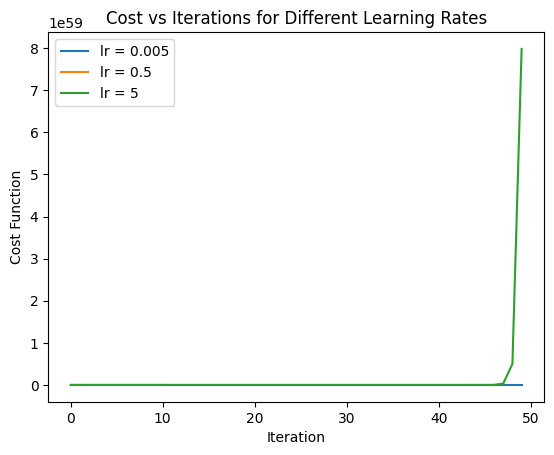

In [ ]:
#plotting cost vs iterations for different learning rates
for lr in learning_rates:
    _,_,costs=batch_gradient_descent(lr,max_iter=50)
    plt.plot(range(len(costs)),costs,label=f'lr = {lr}')
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Cost vs Iterations for Different Learning Rates")
plt.legend()
plt.show()

In [ ]:
#choose the best learning rate for other methods (lr=0.5)
#batch gradient descent
theta0_batch,theta1_batch,costs_batch=batch_gradient_descent(0.5)

#stochastic gradient descent
theta0_sgd,theta1_sgd,costs_sgd=stochastic_gradient_descent(0.5)

#mini-batch gradient descent
theta0_mbgd,theta1_mbgd,costs_mbgd=mini_batch_gradient_descent(0.5,batch_size)

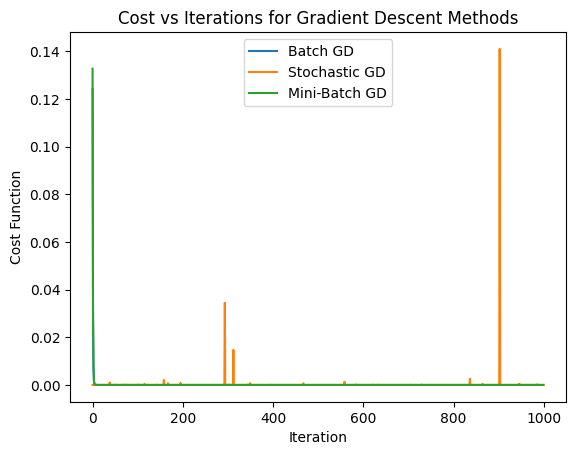

In [ ]:
#olot cost vs iterations for gradient descent methods
plt.plot(range(len(costs_batch)),costs_batch,label='Batch GD')
plt.plot(range(len(costs_sgd)),costs_sgd,label='Stochastic GD')
plt.plot(range(len(costs_mbgd)),costs_mbgd,label='Mini-Batch GD')
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Cost vs Iterations for Gradient Descent Methods")
plt.legend()
plt.show()

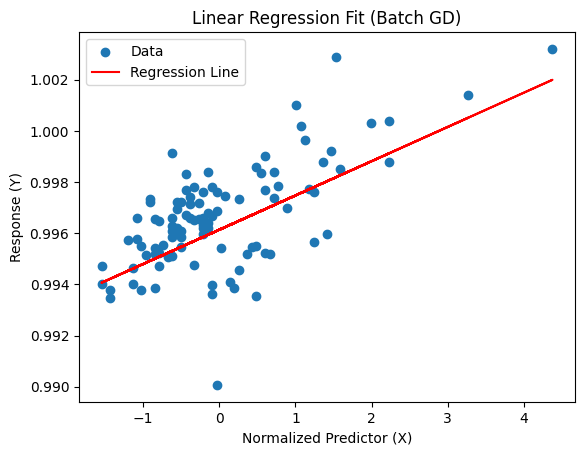

In [ ]:
#plot dataset and regression line for batch GD
plt.scatter(X,y,label='Data')
plt.plot(X,theta0_batch+theta1_batch*X,color='red',label='Regression Line')
plt.xlabel("Normalized Predictor (X)")
plt.ylabel("Response (Y)")
plt.title("Linear Regression Fit (Batch GD)")
plt.legend()
plt.show()


In [ ]:
#final values after convergence
print("Final cost function value (Batch GD):",costs_batch[-1])
print("Theta0 (Batch GD):",theta0_batch)
print("Theta1 (Batch GD):",theta1_batch)

Final cost function value (Batch GD): 1.313194845507832e-06
Theta0 (Batch GD): 0.9961334690917968
Theta1 (Batch GD): 0.0013395416259238116


#QAs

###Advantage of averaging the cost:

Averaging ensures the cost function does not scale with the dataset size, making it easier to compare across datasets.

###Cost vs Iteration Graph: Shown above for first 50 iterations.

###Regression Fit Plot: Shown above.

###Learning Rates Comparison:
- lr = 0.005: Slow convergence
- lr = 0.5: Balanced, converges quickly and stably
- lr = 5: Unstable, may diverge

###Comparison of Gradient Descent Methods:
- Batch GD: Stable, but slower due to processing all data per iteration.
- Stochastic GD: Faster, but noisier convergence.
- Mini-Batch GD: Balance between stability and speed.
